### Step Forward Selection (SFS)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
data = load_wine()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [7]:
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)

In [8]:
X.columns = data.feature_names

In [9]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [12]:
X_train.shape, X_test.shape

((142, 13), (36, 13))

### Step Forward Selection

In [34]:
sfs = SFS(RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -5),
          k_features = 7,
          forward = True,
          floating = False, 
          verbose = 2,
          scoring = 'accuracy',
          cv = 8,
          n_jobs = -5
         ).fit(X_train, y_train)

[Parallel(n_jobs=-5)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-5)]: Done  13 out of  13 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=-5)]: Done  13 out of  13 | elapsed:    6.4s finished

[2021-02-11 09:51:34] Features: 1/7 -- score: 0.7818627450980392[Parallel(n_jobs=-5)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-5)]: Done  12 out of  12 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=-5)]: Done  12 out of  12 | elapsed:    6.6s finished

[2021-02-11 09:51:40] Features: 2/7 -- score: 0.9579248366013071[Parallel(n_jobs=-5)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-5)]: Done  11 out of  11 | elapsed:    5.4s finished

[2021-02-11 09:51:46] Features: 3/7 -- score: 0.9861111111111112[Parallel(n_jobs=-5)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-5)]: Done  10 out of  10 | elapsed:    5.1s finished

[2021-02-11 09:51:51] Features: 4/7 -- score: 0.986111

In [35]:
sfs.k_feature_names_

('alcohol',
 'malic_acid',
 'magnesium',
 'flavanoids',
 'nonflavanoid_phenols',
 'color_intensity',
 'od280/od315_of_diluted_wines')

In [36]:
sfs.k_score_

0.9930555555555556

In [37]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.8333333333333334, 0.6666666666666666, 0.888...",0.781863,"(flavanoids,)",0.066689,0.0765144,0.0289197
2,"(6, 9)","[0.9444444444444444, 0.8888888888888888, 1.0, ...",0.957925,"(flavanoids, color_intensity)",0.0321759,0.0369164,0.0139531
3,"(4, 6, 9)","[0.9444444444444444, 1.0, 1.0, 1.0, 1.0, 0.944...",0.986111,"(magnesium, flavanoids, color_intensity)",0.0209671,0.0240563,0.00909241
4,"(0, 4, 6, 9)","[1.0, 0.9444444444444444, 1.0, 1.0, 1.0, 0.944...",0.986111,"(alcohol, magnesium, flavanoids, color_intensity)",0.0209671,0.0240563,0.00909241
5,"(0, 4, 6, 9, 11)","[1.0, 0.9444444444444444, 1.0, 1.0, 1.0, 1.0, ...",0.993056,"(alcohol, magnesium, flavanoids, color_intensi...",0.0160139,0.0183733,0.00694444
6,"(0, 1, 4, 6, 9, 11)","[1.0, 0.9444444444444444, 0.9444444444444444, ...",0.986111,"(alcohol, malic_acid, magnesium, flavanoids, c...",0.0209671,0.0240563,0.00909241
7,"(0, 1, 4, 6, 7, 9, 11)","[1.0, 0.9444444444444444, 1.0, 1.0, 1.0, 1.0, ...",0.993056,"(alcohol, malic_acid, magnesium, flavanoids, n...",0.0160139,0.0183733,0.00694444


### STEP BACKWARD SELECTION (SBS)

In [40]:
sfs = SFS(RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -5 ),
         k_features = (1,8),
         forward = False,
         floating = False,
          verbose = 2,
          scoring = 'accuracy',
          cv = 5,
          n_jobs = -5
         ).fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

In [41]:
sbs = sfs

In [42]:
sbs.k_score_

0.993103448275862

In [44]:
sbs.k_feature_names_

('alcohol',
 'malic_acid',
 'ash',
 'magnesium',
 'total_phenols',
 'proanthocyanins',
 'color_intensity',
 'od280/od315_of_diluted_wines')

## Exhaustive Feature Selection (EFS)

In [46]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs = EFS(RandomForestClassifier(n_estimators=100, random_state = 0, n_jobs = -1),
         min_features = 4,
         max_features = 5,
         scoring = 'accuracy',
         cv = None, 
         n_jobs = -1).fit(X_train, y_train)

Features: 2002/2002

In [48]:
715 + 1287

2002

In [49]:
## 2002 set features

efs.best_score_

1.0

In [52]:
efs.best_feature_names_

('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash')

In [53]:
efs.best_idx_

(0, 1, 2, 3)

In [54]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

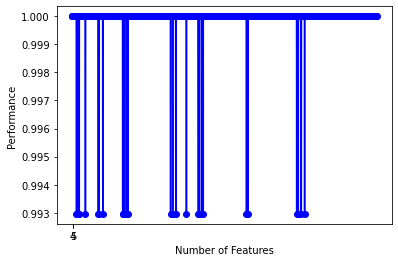

In [55]:
plot_sfs(efs.get_metric_dict(), kind='std_dev')